# Proyectores de Instrumento de Enel. 4 años

In [1]:
import ast, json, random, argparse
import os, sys, datetime, shutil
import statistics, ssl, re, string
import datetime, math, pickle
import umap,pdb
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
import seaborn as sns
#
from scipy import stats
from plotly import tools
from plotly.subplots import make_subplots
from datetime import date, timedelta
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.11/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#
PIK = './fase_01_datos.pkl'
with open(PIK, "rb") as f:
    refs    = pickle.load(f)
    dat_unt = pickle.load(f)

In [3]:
dat_unt.columns

Index(['Time:ISO', 'POTENCIA_ACTIVA:MW', 'POTENCIA_REACTIVA:Mvar',
       'TEMPERATURA_SALIDA_CHIMENEA_BYPASS:degC',
       'PRESION_SALIDA_CHIMENEA_BYPASS:bara',
       'TOTALIZADOR_INYECCION_DE_AGUA:kg', 'POSICION_IGV:degC',
       'CAIDA_PRESION_FILTROS_ENTRADA_COMPRESOR:barg',
       'TEMPERATURA_ENTRADA_AIRE_COMPRESOR:degC',
       'PRESIÐ£N_DESCARGA_COMPRESOR:barg',
       'TEMPERATURA_DESCARGA_COMPRESOR:degC',
       'TEMPERATURA_REFERENCIA_CONTROL_COMBUSTION:degC',
       'TEMPERATURA_ESCAPE_TURBINA:degC',
       'PRIMER_NIVEL_DISPERSION_TEMPERATURAS_ESCAPE:degC',
       'NIVEL_DE_DISPERSION_MAXIMO_PERMITIDO:degC',
       'FACTOR_POTENCIA_ALIMENTACION_BARRAS_MT:N/A',
       'VELOCIDAD_ROTOR_TURBINA_GAS:rpm', 'FRECUENCIA_DE_GENERACION:Hz',
       'CAUDAL_AGUA_ALIMENTACION_AP:Tn/h',
       'CAUDAL_AGUA_CONDENSADO_A_ECONOMIZADOR_BP:Tn/h',
       'CAUDAL_VAPOR_VAPOR_PRINCIPAL__TURBINA_AP:Tn/h',
       'CAUDAL_VAPOR_VAPOR_PRINCIPAL__TURBINA_BP:Tn/h',
       'CAUDAL_ATEMPERACION_SOBR

In [41]:
dat_unt['Week'] = dat_unt['Time:ISO'].dt.isocalendar().week
dat_unt['Year'] = dat_unt['Time:ISO'].dt.year
dat_unt['Dweek']= dat_unt['Time:ISO'].dt.dayofweek
dat_unt['Hour'] = dat_unt['Time:ISO'].dt.hour
week_ref = dat_unt.iloc[0]['Week']+1
year_ref = dat_unt.iloc[0]['Year']
dat_unt.loc[0]

Time:ISO                                                  2019-09-12 00:00:00
POTENCIA_ACTIVA:MW                                                   0.041861
POTENCIA_REACTIVA:Mvar                                              -0.107773
TEMPERATURA_SALIDA_CHIMENEA_BYPASS:degC                             92.843274
PRESION_SALIDA_CHIMENEA_BYPASS:bara                               1014.562318
TOTALIZADOR_INYECCION_DE_AGUA:kg                                  836868864.0
POSICION_IGV:degC                                                   26.309298
CAIDA_PRESION_FILTROS_ENTRADA_COMPRESOR:barg                         0.540243
TEMPERATURA_ENTRADA_AIRE_COMPRESOR:degC                             30.475943
PRESIÐ£N_DESCARGA_COMPRESOR:barg                                     0.106762
TEMPERATURA_DESCARGA_COMPRESOR:degC                                166.039042
TEMPERATURA_REFERENCIA_CONTROL_COMBUSTION:degC                     -17.777779
TEMPERATURA_ESCAPE_TURBINA:degC                                 

In [42]:
refs['varsRed']

['FACTOR_POTENCIA_ALIMENTACION_BARRAS_MT:N/A',
 'TEMPERATURA_DESCARGA_COMPRESOR:degC',
 'FRECUENCIA_DE_GENERACION:Hz',
 'CAIDA_PRESION_FILTROS_ENTRADA_COMPRESOR:barg',
 'CAUDAL_VAPOR_VAPOR_PRINCIPAL__TURBINA_AP:Tn/h',
 'TEMPERATURA_ESCAPE_TURBINA:degC',
 'TEMPERATURA_SALIDA_CHIMENEA_BYPASS:degC',
 'PRESIÐ£N_DESCARGA_COMPRESOR:barg',
 'TEMPERATURA_ENTRADA_AIRE_COMPRESOR:degC',
 'POSICION_IGV:degC']

In [48]:
idx = (dat_unt['Week'].isin([week_ref,(week_ref+1)]))&(dat_unt['Year']==year_ref)
ndat = dat_unt.loc[idx,refs['varsRed']+['POTENCIA_ACTIVA:MW']]
ndatT= dat_unt.loc[idx,refs['varsRed']+['POTENCIA_ACTIVA:MW']+['Time:ISO']]

In [49]:
ndat.shape

(1984, 11)

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



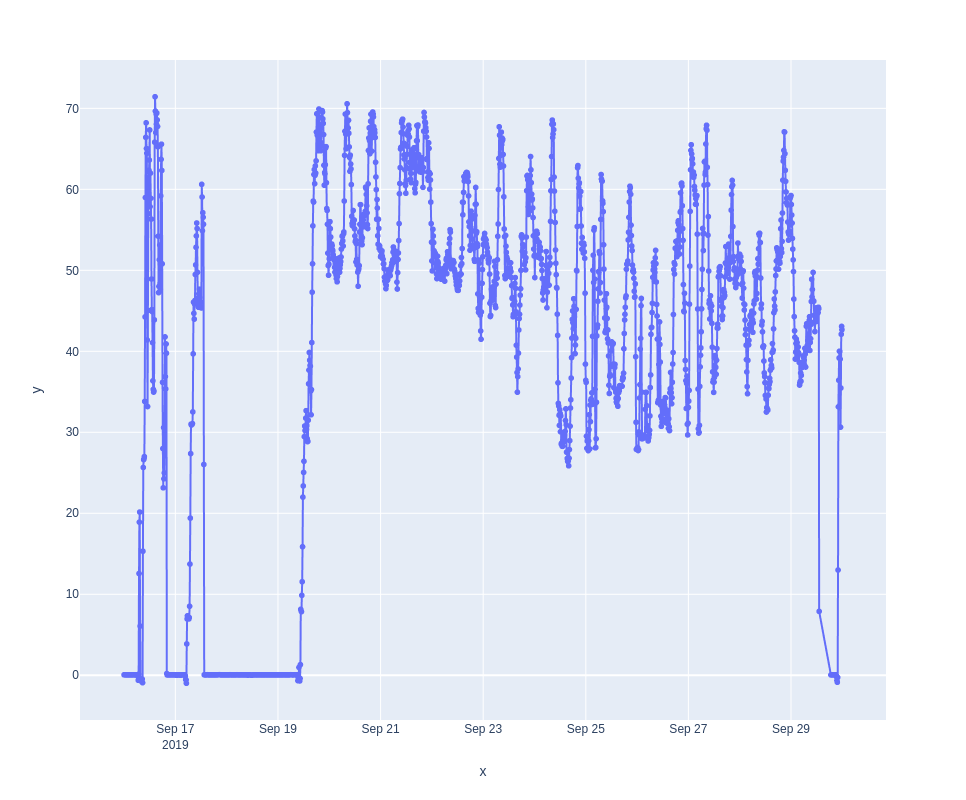

In [74]:
fig = px.scatter(x=pd.to_datetime(ndatT["Time:ISO"],unit='s'),
                 y=ndatT["POTENCIA_ACTIVA:MW"]).update_traces(mode='lines+markers')
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
)
fig.show()

In [56]:
type(ndatT.iloc[0]["Time:ISO"])

pandas._libs.tslibs.timestamps.Timestamp

In [25]:
scaled_data = StandardScaler().fit_transform(ndat)
stats.describe(scaled_data)

DescribeResult(nobs=1984, minmax=(array([-17.50712751,  -2.29963194,  -2.04035378,  -1.94834764,
        -1.71617113,  -2.19771604,  -0.70802511,  -1.95757092,
        -1.82301566,  -1.91553052]), array([0.97850834, 0.69879685, 0.51059839, 1.16639416, 1.04905963,
       0.64420034, 4.97704825, 1.00751922, 3.12551079, 1.43701644])), mean=array([ 1.14603667e-16,  1.71905501e-16, -5.73018335e-17,  0.00000000e+00,
       -2.57858251e-16,  2.29207334e-16,  7.16272919e-18, -3.72461918e-16,
        6.30320169e-16,  1.43254584e-16]), variance=array([1.00050429, 1.00050429, 1.00050429, 1.00050429, 1.00050429,
       1.00050429, 1.00050429, 1.00050429, 1.00050429, 1.00050429]), skewness=array([-14.7866604 ,  -1.54415736,  -1.52428836,  -1.19442612,
        -1.03629059,  -1.54756091,   4.09317221,  -1.30305016,
         0.94348347,  -1.0959913 ]), kurtosis=array([ 2.46387633e+02,  5.36777587e-01,  3.43094836e-01, -1.29661451e-01,
       -7.34716118e-01,  5.25165968e-01,  1.60921713e+01, -3.964384

In [29]:
reducer = umap.UMAP(metric='cosine', random_state=42)

In [30]:
embedding = reducer.fit_transform(scaled_data)
embedding.shape

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



(1984, 2)

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



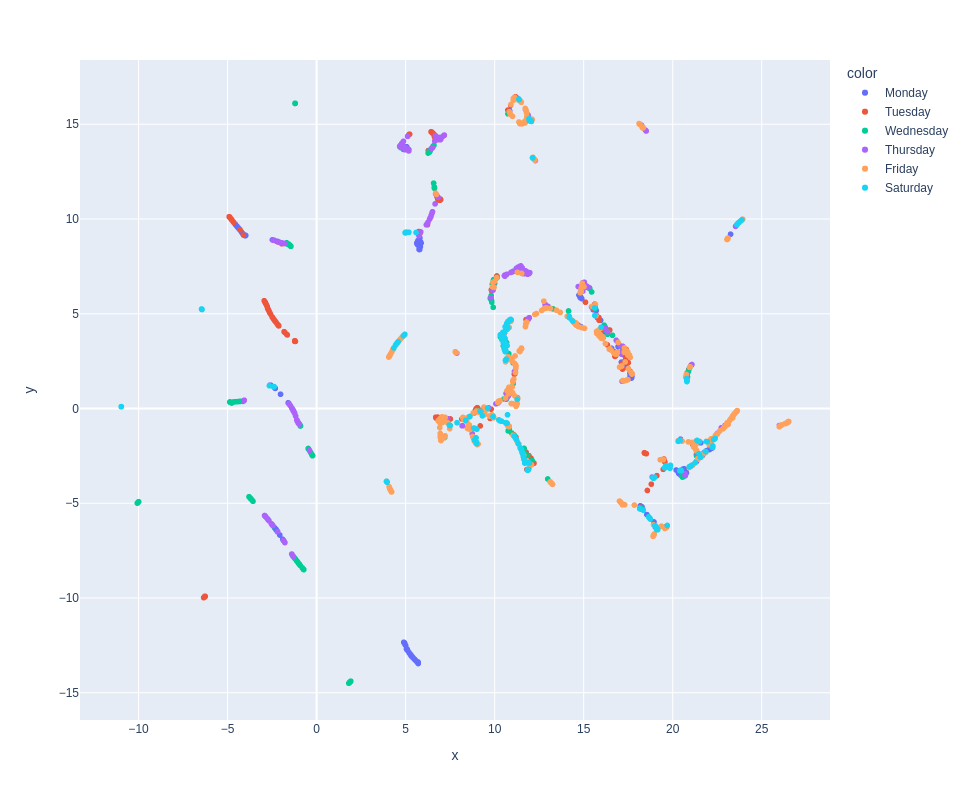

In [31]:

fig = px.scatter(x=embedding[:, 0],y=embedding[:, 1],
    color=dat_unt.loc[idx,'Dweek'].map({0:"Monday", 1:"Tuesday", 2:"Wednesday",3:"Thursday",
                     4:"Friday",5:"Friday",6:"Saturday",7:"Sunday"}),hover_name=dat_unt.loc[idx,'Time:ISO']
                )
# plt.gca().set_aspect('equal', 'datalim')
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
)
fig.show()